In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
credits = pd.read_csv(r"/content/drive/MyDrive/movie recommender system/tmdb_5000_credits.csv")
movies = pd.read_csv(r"/content/drive/MyDrive/movie recommender system/tmdb_5000_movies.csv")

In [4]:
credits.head(n = 7)
movies.head(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [5]:
movies.columns


Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

In [6]:
credits.columns

Index(['movie_id', 'title', 'cast', 'crew'], dtype='object')

In [7]:
credits_updated_df = credits.rename(columns = {"movie_id" : "id"})

In [8]:
credits_updated_df

,id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [9]:
movies.shape

(4803, 20)

In [10]:
credits_updated_df.shape

(4803, 4)

In [11]:
movies_df_merge = movies.merge(credits_updated_df , on = "id")

In [12]:
movies_df_merge.shape

(4803, 23)

In [13]:
movies_df_merge.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title_x', 'vote_average',
       'vote_count', 'title_y', 'cast', 'crew'],
      dtype='object')

In [14]:
movies_cleaned_df = movies_df_merge.drop(columns = ['homepage' , 'title_x' , 'title_y' ,'status' , 'production_countries'])

In [15]:
movies_cleaned_df.head(2)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


#Understanding Average weighted Recommendation System !

In [16]:
movies_cleaned_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [17]:
# Source: http://trailerpark.weebly.com/imdb-rating.html?source=post_pageom/imdb-rating.html?source=post_page

In [18]:
v = movies_cleaned_df['vote_count']
R = movies_cleaned_df['vote_average']
C = movies_cleaned_df['vote_average'].mean()

In [19]:
C

## mean rating for all the movies is approx 6.09 on a scale of 10

np.float64(6.092171559442016)

#### The next step is to determine an appropriate value for m ( minimum votes required to be listed in the chart)

In [20]:

movies_cleaned_df[['original_title' , 'vote_count']]

,original_title,vote_count
0,Avatar,11800
1,Pirates of the Caribbean: At World's End,4500
2,Spectre,4466
3,The Dark Knight Rises,9106
4,John Carter,2124
...,...,...
4798,El Mariachi,238
4799,Newlyweds,5
4800,"Signed, Sealed, Delivered",6
4801,Shanghai Calling,7


<Axes: xlabel='vote_count'>

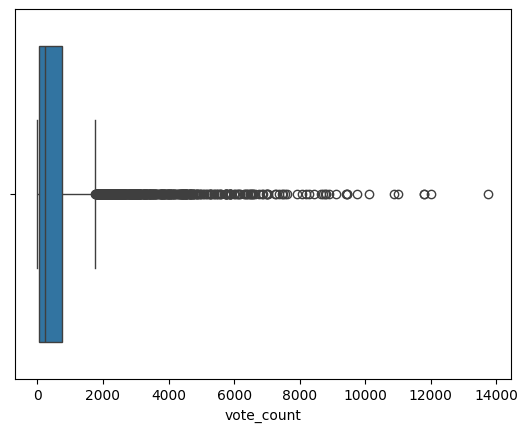

In [21]:
sns.boxplot(data= movies_cleaned_df , x = 'vote_count')

## m = 1900



In [22]:
'''

We will use 90th percentile as our cutoff.
In other words, for a movie to feature in the charts,
It must have more votes than at least 90% of the movies in the list.

'''

'\n\nWe will use 90th percentile as our cutoff.\nIn other words, for a movie to feature in the charts,\nIt must have more votes than at least 90% of the movies in the list.\n\n'


# 4.. Building Average Weighted Recommendation System !




In [23]:
threshold = movies_cleaned_df['vote_count'].quantile(q = 0.9)

## movies_cleaned_df['vote_count'].quantile(q = 0.92)

In [24]:
filtered_df = movies_cleaned_df[movies_cleaned_df['vote_count']>=threshold]

In [25]:
filtered_df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...",2004-10-01,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Live or die. Make your choice.,7.2,2184,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de..."
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...",1992-09-02,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Every dog has his day.,8.0,3697,"[{""cast_id"": 20, ""character"": ""Mr. White/Larry...","[{""credit_id"": ""52fe424ac3a36847f8012cb9"", ""de..."
4302,1200000,"[{""id"": 37, ""name"": ""Western""}]",429,"[{""id"": 801, ""name"": ""bounty hunter""}, {""id"": ...",it,"Il buono, il brutto, il cattivo",Whi

In [26]:
m = threshold
m


np.float64(1838.4000000000015)

In [27]:
R




,vote_average
0,7.2
1,6.9
2,6.3
3,7.6
4,6.1
...,...
4798,6.6
4799,5.9
4800,7.0
4801,5.7


In [28]:
C

np.float64(6.092171559442016)

In [29]:
v

,vote_count
0,11800
1,4500
2,4466
3,9106
4,2124
...,...
4798,238
4799,5
4800,6
4801,7


In [30]:
v = filtered_df['vote_count']
R = filtered_df['vote_average']
C = filtered_df['vote_average'].mean()

In [31]:
C

np.float64(6.962993762993763)

In [32]:
filtered_df['weighted_avg'] = ((R*v) + (C*m))/(v+m)

/tmp/ipython-input-1174332114.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['weighted_avg'] = ((R*v) + (C*m))/(v+m)


In [33]:
filtered_df

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.168053
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.918271
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.493333
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.492998
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","Lost in our world, found in another.",6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",6.500396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,1200000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 9648, ""n...",176,"[{""id"": 1366, ""name"": ""shotgun""}, {""id"": 13000...",en,Saw,Obsessed with teaching his victims the value o...,63.655973,"[{""name"": ""Lions Gate Films"", ""id"": 35}, {""nam...",2004-10-01,103911669,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Live or die. Make your choice.,7.2,2184,"[{""cast_id"": 4, ""character"": ""Dr. Lawrence Gor...","[{""credit_id"": ""52fe4223c3a36847f8006c57"", ""de...",7.091679
4300,1200000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",500,"[{""id"": 2052, ""name"": ""traitor""}, {""id"": 6099,...",en,Reservoir Dogs,A botched robbery indicates a police informant...,66.925866,"[{""name"": ""Live Entertainment"", ""id"": 285}, {""...",1992-09-02,14661007,99.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Every dog has his day.,8.0,3697,"[{""cast_id"": 20, ""character"": ""Mr. White/Larry...","[{""credit_id"": ""52fe424ac3a36847f8012cb9"", ""de...",7.655593
4302,1200000,"[{""id"": 37, ""name"": ""Western""}]",429,"[{""id"": 801, ""na

In [34]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [35]:
df_sorted_ranking = filtered_df.sort_values('weighted_avg' , ascending= False).head(20)

In [36]:
df_sorted_ranking.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [37]:
df_sorted_ranking[['original_title' , 'vote_average', 'vote_count' , 'weighted_avg' , 'popularity']]

,original_title,vote_average,vote_count,weighted_avg,popularity
1881,The Shawshank Redemption,8.5,8205,8.218658,136.747729
662,Fight Club,8.3,9413,8.081543,146.757391
3232,Pulp Fiction,8.3,8428,8.060583,121.463076
3337,The Godfather,8.4,5893,8.058304,143.659698
65,The Dark Knight,8.2,12002,8.035690,187.322927
809,Forrest Gump,8.2,7927,7.967126,138.133331
96,Inception,8.1,13752,7.965926,167.583710
95,Interstellar,8.1,10867,7.935482,724.247784
1990,The Empire Strikes Back,8.2,5879,7.905327,78.517830
1818,Schindler's List,8.3,4329,7.901461,104.469351


In [38]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

<Axes: xlabel='weighted_avg', ylabel='original_title'>

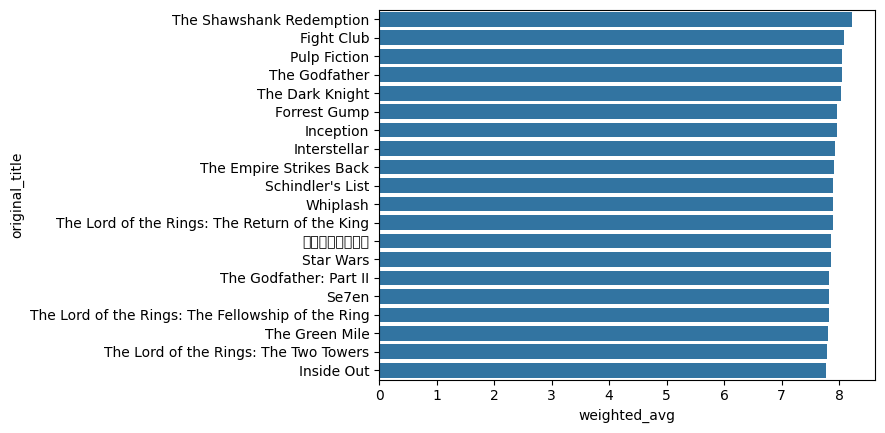

In [39]:
sns.barplot(x = df_sorted_ranking['weighted_avg'] , y = df_sorted_ranking['original_title'])


# 5.. Building Popularity based Recommender System !

In [40]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [41]:
popularity_df = filtered_df.sort_values('popularity' , ascending= False)

<Axes: ylabel='original_title'>

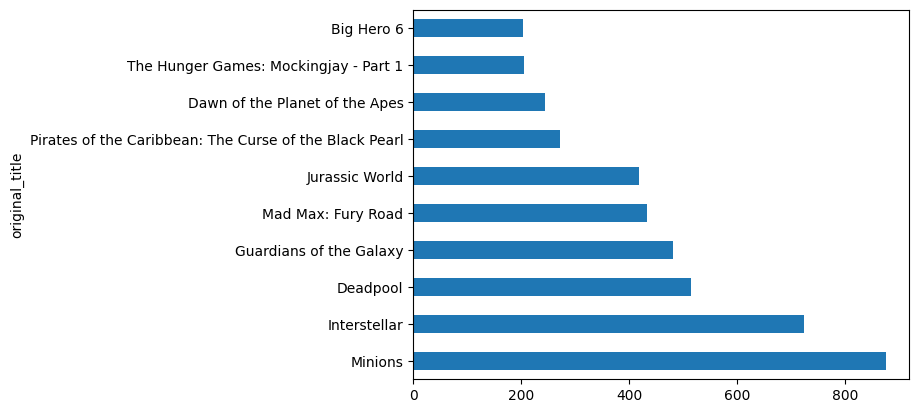

In [42]:
popularity_df.set_index('original_title')['popularity'][0:10].plot.barh()

#6.. How to perform normalization !

In [43]:
filtered_df.shape

(481, 19)

In [44]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg'],
      dtype='object')

In [45]:
filtered_df[['weighted_avg' , 'popularity']][0:5]

,weighted_avg,popularity
0,7.168053,150.437577
1,6.918271,139.082615
2,6.493333,107.376788
3,7.492998,112.312950
4,6.500396,43.926995


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
scaling = MinMaxScaler()

In [48]:
scaling_values = scaling.fit_transform(filtered_df[['weighted_avg' , 'popularity']])

In [49]:
filtered_df[['weighted_avg_scaled' , 'popularity_scaled']] = scaling_values

In [50]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [51]:
filtered_df.head(3)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,runtime,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg,weighted_avg_scaled,popularity_scaled
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.168053,0.607106,0.170052
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.918271,0.513695,0.157056
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.493333,0.354781,0.120768


In [52]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled'],
      dtype='object')

In [53]:
filtered_df['score_mix'] = filtered_df['weighted_avg_scaled'] * 0.5 + filtered_df['popularity_scaled'] * 0.5

In [54]:
filtered_df.head(4)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,release_date,...,spoken_languages,tagline,vote_average,vote_count,cast,crew,weighted_avg,weighted_avg_scaled,popularity_scaled,score_mix
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",2009-12-10,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Enter the World of Pandora.,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",7.168053,0.607106,0.170052,0.388579
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",2007-05-19,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]","At the end of the world, the adventure begins.",6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",6.918271,0.513695,0.157056,0.335375
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",2015-10-26,...,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",A Plan No One Escapes,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",6.493333,0.354781,0.120768,0.237774
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",2012-07-16,...,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",The Legend Ends,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",7.492998,0.728625,0.126417,0.427521


In [55]:
rank_df = filtered_df.sort_values('score_mix' , ascending= False).head(10)

In [56]:
import plotly.express as px

In [57]:
px.bar(data_frame= rank_df , x = 'original_title' , y = 'score_mix')

In [58]:
filtered_df.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg',
       'weighted_avg_scaled', 'popularity_scaled', 'score_mix'],
      dtype='object')

In [59]:
# ✅ Use ALL movies instead of only the filtered ones
data = movies_cleaned_df.copy()

# Fill missing overviews to avoid TF-IDF errors
data['overview'] = data['overview'].fillna('')

# Build TF-IDF matrix using all movies
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df=3, max_features=None, ngram_range=(1, 3), stop_words="english")
tfv_matrix = tfv.fit_transform(data['overview'])

# Compute sigmoid similarity on all movies
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

# Reset index for safety
data = data.reset_index(drop=True)


In [60]:
data.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline',
       'vote_average', 'vote_count', 'cast', 'crew'],
      dtype='object')

In [61]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [62]:
data['overview'].isnull().sum()

np.int64(0)

In [63]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [64]:
tfv = TfidfVectorizer(min_df= 3 ,
               max_features=None ,
               ngram_range= (1 , 3) ,
               stop_words= "english")

In [65]:
tfv_matrix = tfv.fit_transform(data['overview'])

In [66]:
tfv_matrix

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 121480 stored elements and shape (4803, 9919)>

In [67]:
tfv_matrix.shape

(4803, 9919)

In [68]:
data['overview'][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [69]:
tfv_matrix.toarray()[0]

array([0., 0., 0., ..., 0., 0., 0.])

In [70]:
pd.DataFrame(tfv_matrix.toarray())

,0,1,2,3,4,5,6,7,8,9,...,9909,9910,9911,9912,9913,9914,9915,9916,9917,9918
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4799,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
data['overview']

,overview
0,"In the 22nd century, a paraplegic Marine is di..."
1,"Captain Barbossa, long believed to be dead, ha..."
2,A cryptic message from Bond’s past sends him o...
3,Following the death of District Attorney Harve...
4,"John Carter is a war-weary, former military ca..."
...,...
4798,El Mariachi just wants to play his guitar and ...
4799,A newlywed couple's honeymoon is upended by th...
4800,"""Signed, Sealed, Delivered"" introduces a dedic..."
4801,When ambitious New York attorney Sam is sent t...


In [72]:
from sklearn.metrics.pairwise import sigmoid_kernel

In [73]:
sig = sigmoid_kernel(tfv_matrix , tfv_matrix)

In [74]:
sig

array([[0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
        0.76159416],
       [0.76159416, 0.76163649, 0.76159416, ..., 0.76159519, 0.76159416,
        0.76159416],
       [0.76159416, 0.76159416, 0.76163649, ..., 0.76159484, 0.76159416,
        0.76159416],
       ...,
       [0.76159416, 0.76159519, 0.76159484, ..., 0.76163649, 0.76159488,
        0.76159447],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159488, 0.76163649,
        0.76159467],
       [0.76159416, 0.76159416, 0.76159416, ..., 0.76159447, 0.76159467,
        0.76163649]])

In [75]:
pd.DataFrame(sig)

,0,1,2,3,4,5,6,7,8,9,...,4793,4794,4795,4796,4797,4798,4799,4800,4801,4802
0,0.761636,0.761594,0.761594,0.761595,0.761594,0.761595,0.761594,0.761596,0.761594,0.761594,...,0.761594,0.761594,0.761595,0.761596,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
1,0.761594,0.761636,0.761594,0.761594,0.761596,0.761594,0.761594,0.761595,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761595,0.761594,0.761594
2,0.761594,0.761594,0.761636,0.761594,0.761594,0.761594,0.761594,0.761596,0.761595,0.761594,...,0.761596,0.761594,0.761594,0.761594,0.761595,0.761594,0.761594,0.761595,0.761594,0.761594
3,0.761595,0.761594,0.761594,0.761636,0.761595,0.761594,0.761595,0.761595,0.761595,0.761601,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761595,0.761596,0.761596
4,0.761594,0.761596,0.761594,0.761595,0.761636,0.761594,0.761595,0.761596,0.761594,0.761595,...,0.761595,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761595,0.761595,0.761594,...,0.761594,0.761595,0.761594,0.761594,0.761594,0.761636,0.761594,0.761594,0.761595,0.761594
4799,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,...,0.761594,0.761594,0.761594,0.761594,0.761594,0.761594,0.761636,0.761594,0.761594,0.761594
4800,0.761594,0.761595,0.761595,0.761595,0.761594,0.761595,0.761594,0.761594,0.761595,0.761595,...,0.761595,0.761594,0.761595,0.761595,0.761594,0.761594,0.761594,0.761636,0.761595,0.761594
4801,0.761594,0.761594,0.761594,0.761596,0.761594,0.761594,0.761595,0.761594,0.761596,0.761594,...,0.761594,0.761595,0.761594,0.761594,0.761594,0.761595,0.761594,0.761595,0.761636,0.761595


In [76]:
sig[0]

array([0.76163649, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159416,
       0.76159416])

In [77]:
data['original_title']

,original_title
0,Avatar
1,Pirates of the Caribbean: At World's End
2,Spectre
3,The Dark Knight Rises
4,John Carter
...,...
4798,El Mariachi
4799,Newlyweds
4800,"Signed, Sealed, Delivered"
4801,Shanghai Calling


In [78]:
data.index

RangeIndex(start=0, stop=4803, step=1)

In [79]:
indices = pd.Series(data = data.index , index= data['original_title'])

In [80]:
indices

,0
original_title,
Avatar,0
Pirates of the Caribbean: At World's End,1
Spectre,2
The Dark Knight Rises,3
John Carter,4
...,...
El Mariachi,4798
Newlyweds,4799
"Signed, Sealed, Delivered",4800


In [81]:
indices['John Carter']

np.int64(4)

In [82]:
sig[indices['John Carter']]

array([0.76159416, 0.76159592, 0.76159416, ..., 0.76159446, 0.76159416,
       0.76159416])

In [83]:
list(enumerate(sig[indices['John Carter']]))

[(0, np.float64(0.7615941559557649)),
 (1, np.float64(0.7615959159207439)),
 (2, np.float64(0.7615941559557649)),
 (3, np.float64(0.7615946102871232)),
 (4, np.float64(0.76163649309625)),
 (5, np.float64(0.7615941559557649)),
 (6, np.float64(0.7615946289744094)),
 (7, np.float64(0.7615961147139183)),
 (8, np.float64(0.7615941559557649)),
 (9, np.float64(0.761595001131074)),
 (10, np.float64(0.761595105824097)),
 (11, np.float64(0.7615941559557649)),
 (12, np.float64(0.7615956343476428)),
 (13, np.float64(0.7615941559557649)),
 (14, np.float64(0.7615946114980854)),
 (15, np.float64(0.7615941559557649)),
 (16, np.float64(0.7615988551534335)),
 (17, np.float64(0.7615951283013518)),
 (18, np.float64(0.7615949666255744)),
 (19, np.float64(0.7615951165270788)),
 (20, np.float64(0.7615946170543116)),
 (21, np.float64(0.7615950565015551)),
 (22, np.float64(0.7615941559557649)),
 (23, np.float64(0.7615941559557649)),
 (24, np.float64(0.7615949775963369)),
 (25, np.float64(0.7615941559557649)),


In [84]:
sigma = sorted(list(enumerate(sig[indices['John Carter']])) , key= lambda x : x[1] , reverse=True)

In [85]:
sigma[0:10]

[(4, np.float64(0.76163649309625)),
 (1254, np.float64(0.761603645976439)),
 (4161, np.float64(0.7616029019923808)),
 (2932, np.float64(0.7616000895164158)),
 (3349, np.float64(0.7615998742650231)),
 (1307, np.float64(0.7615997667705955)),
 (91, np.float64(0.7615997552712689)),
 (345, np.float64(0.761599162624253)),
 (3068, np.float64(0.7615989297302412)),
 (16, np.float64(0.7615988551534335))]

In [86]:
ind = [i[0] for i in sigma[0:10]]

In [87]:
ind

[4, 1254, 4161, 2932, 3349, 1307, 91, 345, 3068, 16]

In [88]:
data['original_title'].iloc[ind]


,original_title
4,John Carter
1254,Get Carter
4161,The Marine 4: Moving Target
2932,Raising Cain
3349,Desperado
1307,The Hurricane
91,Independence Day: Resurgence
345,Rush Hour 2
3068,Rescue Dawn
16,The Avengers


In [89]:
dataframe = data.reset_index()

In [90]:
dataframe['original_title'][ind]

,original_title
4,John Carter
1254,Get Carter
4161,The Marine 4: Moving Target
2932,Raising Cain
3349,Desperado
1307,The Hurricane
91,Independence Day: Resurgence
345,Rush Hour 2
3068,Rescue Dawn
16,The Avengers


In [91]:
def give_recommendations(movie_title , model):

    indices = pd.Series(data = data.index , index= data['original_title'])

    idx = indices[movie_title]

    model_scores = list(enumerate(model[idx]))

    model_scores_sorted = sorted(model_scores , key= lambda x : x[1] , reverse = True)

    model_scores_10 = model_scores_sorted[1:11]

    movie_indices_10 = [i[0] for i in model_scores_10 ]

    return dataframe['original_title'][movie_indices_10]

In [92]:
print(data.columns.tolist())


['budget', 'genres', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count', 'cast', 'crew']


In [93]:
print(filtered_df.columns.tolist())


['budget', 'genres', 'id', 'keywords', 'original_language', 'original_title', 'overview', 'popularity', 'production_companies', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'tagline', 'vote_average', 'vote_count', 'cast', 'crew', 'weighted_avg', 'weighted_avg_scaled', 'popularity_scaled', 'score_mix']


In [94]:
def give_recommendations(movie_title , model):
    if movie_title not in data['original_title'].values:
        return "Movie not found in database!"

    indices = pd.Series(data = data.index , index= data['original_title'])
    idx = indices[movie_title]
    model_scores = list(enumerate(model[idx]))
    model_scores_sorted = sorted(model_scores , key=lambda x: x[1], reverse=True)
    movie_indices_10 = [i[0] for i in model_scores_sorted[1:11]]
    return data['original_title'].iloc[movie_indices_10]


In [95]:
give_recommendations("Iron Man 3" , sig)

,original_title
68,Iron Man
79,Iron Man 2
2193,Secret in Their Eyes
7,Avengers: Age of Ultron
47,Star Trek Into Darkness
1868,Cradle 2 the Grave
3087,Nicholas Nickleby
4273,The Basket
3789,Trust
590,The Siege


In [ ]:
!pip install gradio plotly --quiet
import gradio as gr
import plotly.express as px
import pandas as pd

# --- FUNCTION: Recommendation logic ---
def give_recommendations(movie_title):
    if movie_title not in data['original_title'].values:
        return "❌ Movie not found. Try another name.", None

    indices = pd.Series(data=data.index, index=data['original_title'])
    idx = indices[movie_title]

    model_scores = list(enumerate(sig[idx]))
    model_scores_sorted = sorted(model_scores, key=lambda x: x[1], reverse=True)
    movie_indices_10 = [i[0] for i in model_scores_sorted[1:11]]

    recommendations = data.iloc[movie_indices_10][['original_title', 'vote_average', 'popularity', 'overview']]

    # --- Plotly Visualization ---
    fig = px.bar(
        recommendations,
        x='vote_average',
        y='original_title',
        orientation='h',
        title=f"🎬 Top 10 Movies Similar to '{movie_title}'",
        text='vote_average',
        color='popularity',
        color_continuous_scale='Turbo'
    )

    fig.update_traces(
        texttemplate='%{text:.2f}',
        textposition='outside',
        marker_line_color='white',
        marker_line_width=1.2
    )

    fig.update_layout(
        yaxis={'categoryorder': 'total ascending', 'title': ''},
        xaxis_title="Average Rating",
        plot_bgcolor='#0F172A',
        paper_bgcolor='#0F172A',
        font=dict(color='white', size=14),
        title_font=dict(size=22, family="Verdana", color="#60A5FA"),
        height=550,
        margin=dict(l=100, r=60, t=80, b=60)
    )

    return recommendations, fig


# --- CUSTOM DARK THEME CSS ---
custom_css = """
.gradio-container {
    background: #0a0a0a;
    font-family: 'Segoe UI', sans-serif;
    color: white;
}
h1 {
    color: #60A5FA !important;
    font-weight: 800 !important;
    font-size: 2.4em !important;
    text-align: center;
    margin-bottom: 0.2em;
}
p {
    text-align: center;
    color: #e5e7eb;
    font-size: 1.1em;
}
button {
    font-size: 1.05em !important;
    border-radius: 10px !important;
    padding: 10px 16px !important;
}
.dataframe {
    background-color: #1e293b !important;
    color: white !important;
}
footer {visibility: hidden;}
"""


# --- GRADIO APP ---
with gr.Blocks(theme=gr.themes.Soft(), css=custom_css) as demo:
    gr.HTML("""
        <h1>🎥 Movie Recommender System</h1>
        <p>Find movies similar to your favorite using TF-IDF + Sigmoid Similarity 💫</p>
        <hr style='width:60%; margin:auto; border:1px solid #374151;'>
    """)

    with gr.Row():
        with gr.Column(scale=1):
            movie_input = gr.Textbox(
                label="🎞️ Enter Movie Name",
                placeholder="e.g. Avatar, Iron Man 3, Titanic",
                autofocus=True
            )
            search_button = gr.Button("🚀 Get Recommendations", variant="primary")
            clear_button = gr.Button("🧹 Clear Results")

        with gr.Column(scale=2):
            output_table = gr.Dataframe(
                headers=["Movie Title", "Vote Avg", "Popularity", "Overview"],
                label="Recommended Movies",
                interactive=False
            )
            output_chart = gr.Plot(label="Recommendation Visualization")

    search_button.click(give_recommendations, inputs=movie_input, outputs=[output_table, output_chart])
    clear_button.click(lambda: ("", None), None, [output_table, output_chart])

    gr.HTML("""
        <hr style='width:70%; margin:auto; border:1px solid #374151; margin-top:20px;'>
        <p style='color:#9ca3af;'>Developed by <b>Shalaka Gangurde</b> 🎬</p>
    """)

demo.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://f9d2fc6474663321cf.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
